In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Dipper_Project_Functions import plotparams
from Research.wise_light_curves.wise_light_curves import *
import scipy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.timeseries import LombScargle as ls
import heapq

In [2]:
# My ID: J005255+633515										 																
id_val = 438086901547												
ra_val = 279.0252466  
dec_val = -31.80714478	

df = pd.read_csv('Research/Updated_LC_data/'+str(id_val)+'.csv')
df['mag'] = pd.to_numeric(df['mag'],errors='coerce')
df = df.dropna()
df['mag'].astype(float)
#df = df.loc[df['mag'] > 12.5].reset_index(drop=True)
df = df.loc[df['mag'] < 15].reset_index(drop=True)
dfg = df.loc[df['Filter'] == 'g'].reset_index(drop=True)
dfv = df.loc[df['Filter'] == 'V'].reset_index(drop=True)

In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')
print(c.ra.hms)
print(c.dec.dms)

hms_tuple(h=18.0, m=36.0, s=6.059184000010873)
dms_tuple(d=-31.0, m=-48.0, s=-25.721208000005618)


In [5]:
print(np.mean(dfg.mag))
print(np.mean(dfv.mag))

13.963886084142393
13.210029968454258


In [6]:
dfg['Mag'] = [float(i) for i in dfg['mag']]

dfg['JD'] = [float(i) for i in dfg['HJD']]

dfv['Mag'] = [float(i) for i in dfv['mag']]

dfv['JD'] = [float(i) for i in dfv['HJD']]

mag = dfg['Mag']

jd = dfg['JD']

meanmag = sum(mag) / len(mag)

dfg_mag_avg = [i - meanmag for i in mag]

peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=2) 

#peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=1.7)

peak = peaks[0]

prop = peaks[1]

length = len(peak)

peak = [int(i) for i in peak]

peak = pd.Series(peak)

Number of peaks: 2


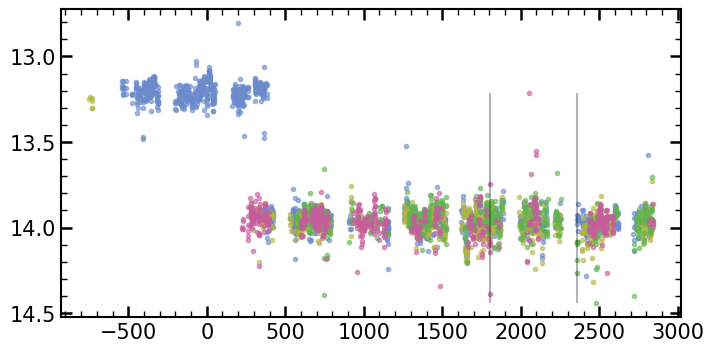

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

print('Number of peaks:', length)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["mag"].astype(float)
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

for i in range(len(peak)):
    ax.vlines((jd[peak[i]] - (2.458 * 10**6)), min(dfg.Mag), max(dfg.Mag), "k", alpha=0.3)

ax.invert_yaxis()

(1600.0, 1700.0)

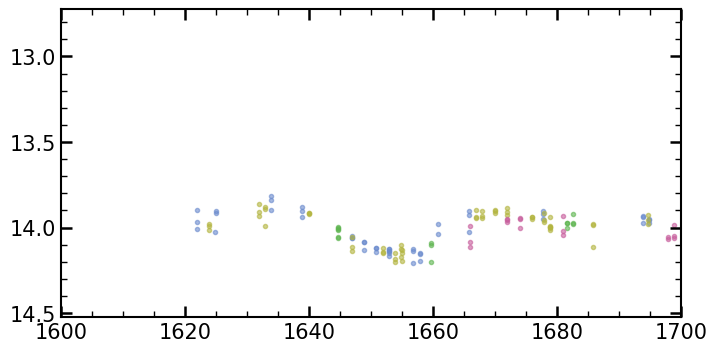

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["mag"].astype(float)
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

ax.invert_yaxis()
ax.set_xlim(1600,1700)#(max(df['HJD'])-(2.458 * 10 ** 6))+100)

In [9]:
first_time = Time(df['HJD'][0], format='jd')
first_time.format = 'iso'
print('The time of the first point:', first_time)

last_time = Time(df['HJD'][(len(df['HJD'])-1)], format='jd')
last_time.format = 'iso'
print('The time of the last point:', last_time)

print(len(df))

The time of the first point: 2015-08-18 01:13:05.664
The time of the last point: 2025-06-16 08:26:44.160
3724


In [10]:
dfg_dip = dfg.loc[dfg["HJD"] > (1600 + 2.458 * 10**6)].reset_index(drop=True)
dfg_dip = dfg_dip.loc[dfg_dip["HJD"] < (1700 + 2.458 * 10**6)].reset_index(drop=True)

In [11]:
dfg_nodip = dfg.loc[dfg["HJD"] > (500 + 2.458 * 10**6)].reset_index(drop=True)
dfg_nodip = dfg_nodip.loc[dfg_nodip["HJD"] < (1500 + 2.458 * 10**6)].reset_index(drop=True)

In [12]:
meannodip = np.mean(dfg_nodip['mag'])
stdnodip = np.std(dfg_nodip['mag'])

deep = max(dfg_dip['mag'])

print('The mean of the LC w/out the dip:', meannodip)
print('The std of the LC w/out the dip:',stdnodip)
print('The deepest point of the dip:', deep)

dfg_deepest = dfg.loc[dfg['mag'] == deep].reset_index(drop=True)
deep_time = Time(dfg_deepest['HJD'][0], format='jd')
deep_time.format = 'iso'

print('The time of the deepest point:', deep_time, dfg_deepest['HJD'][0])

depth = deep - meannodip

print('Dip depth:', depth)

The mean of the LC w/out the dip: 13.955416666666668
The std of the LC w/out the dip: 0.061346170405794556
The deepest point of the dip: 14.205
The time of the deepest point: 2022-03-18 07:26:17.952 2459656.80993
Dip depth: 0.24958333333333194


2022-03-08 09:10:35.040
2022-03-27 11:47:55.968


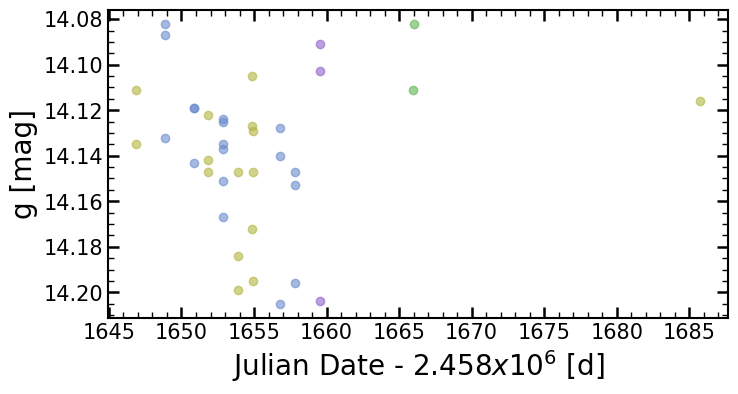

In [13]:
dfg_time = dfg_dip.loc[dfg_dip['mag'] >= (meannodip + 2*stdnodip)].reset_index(drop=True)

t1 = dfg_time['HJD'][1]
t2 = dfg_time['HJD'][len(dfg_time['HJD'])-2]

time1 = Time(t1, format='jd')
time1.format = 'iso'

time2 = Time(t2, format='jd')
time2.format = 'iso'

print(time1)
print(time2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg_time["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg_time.loc[dfg_time["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["HJD"]]
        cammag = [float(i) for i in camdf['mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2.458x10^{6}$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [14]:
print(t1)
print(t2)

2459646.88235
2459665.99162


In [15]:
print(t2-t1)

19.10926999989897


In [ ]:
download_single_data(name='wise_'+str(id_val), ra=ra_val, dec=dec_val, root_path='Research/WISE_Data/', radius=2.)

allwise = ascii.read('Research/WISE_Data/wise_'+str(id_val)+'_allwise.ipac', format='ipac')
neowise = ascii.read('Research/WISE_Data/wise_'+str(id_val)+'_neowise.ipac', format='ipac')
allwise, neowise = only_good_data_v1(allwise, neowise)

print(allwise)
print(neowise)

# MJD = JD - 2400000.5.
allwise['jd'] = allwise['mjd'] + 2400000.5
neowise['jd'] = neowise['mjd'] + 2400000.5

alldf = pd.DataFrame(np.array(allwise))
neodf = pd.DataFrame(np.array(neowise))

In [ ]:
plot_full_lightcurve(allwise,neowise)

In [ ]:
alldf['bins'] = pd.cut(alldf['mjd'],2)

bins = alldf['bins'].unique()

all_df = pd.DataFrame()

for i in bins:
    allbin = alldf.loc[alldf['bins'] == i].reset_index(drop=True)
    allbin['w1mpro_ep'] = allbin['w1mpro_ep'].median()
    allbin['w2mpro_ep'] = allbin['w2mpro_ep'].median()
    all_df = pd.concat([all_df,allbin])

all_df.head(10)

In [ ]:
neodf['bins'] = pd.cut(neodf['mjd'],6)

bins = neodf['bins'].unique()

neo_df = pd.DataFrame()

for i in bins:
    neobin = neodf.loc[neodf['bins'] == i].reset_index(drop=True)
    neobin['w1mpro'] = neobin['w1mpro'].median()
    neobin['w2mpro'] = neobin['w2mpro'].median()
    neo_df = pd.concat([neo_df,neobin])

neo_df.head(10)

In [ ]:
wise_day1 = list(all_df['jd'])
wise_day2 = list(neo_df['jd'])
wise_day = wise_day1 + wise_day2

wise_w1_1 = list(all_df['w1mpro_ep'])
wise_w1_2 = list(neo_df['w1mpro'])
wise_w1 = wise_w1_1 + wise_w1_2

wise_w2_1 = list(all_df['w2mpro_ep'])
wise_w2_2 = list(neo_df['w2mpro'])
wise_w2 = wise_w2_1 + wise_w2_2

wise_color = [j-i for i,j in zip(wise_w2,wise_w1)]

In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
fig.subplots_adjust(hspace=0)
ax[0] = plotparams(ax[0])

wise_day_plot = [i - (2.458 * 10 **6) for i in wise_day]

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
ax[0].scatter((dfg['JD'] - (2.458 * 10 **6)), dfg['mag'], color = colors[2], label='ASAS-SN g-band', alpha = 0.6)

ax[0].invert_yaxis() 
ax[0].set_ylabel('ASAS-SN', fontsize=20)

ax[1] = plotparams(ax[1])

ax[1].scatter(wise_day_plot, wise_w1, color=colors[1], label='W1', alpha=0.6,  marker = 's')
ax[1].scatter(wise_day_plot, wise_w2, color=colors[0], label='W2', alpha=0.6,  marker = 'x')

ax[1].invert_yaxis()
ax[1].set_ylabel('WISE', fontsize=20)

ax[2] = plotparams(ax[2])

ax[2].scatter(wise_day_plot, wise_color, color=colors[5], label='W1$-$W2', alpha=0.6,  marker = '^')

ax[2].set_ylabel('W1$-$W2', fontsize=20)

ax[2].set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)

handles1, labels1 = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles3, labels3 = ax[2].get_legend_handles_labels()
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3
fig.legend(handles, labels, loc='upper left', edgecolor='black', fontsize=12, bbox_to_anchor=(0.12,0.88))
plt.show()

16201


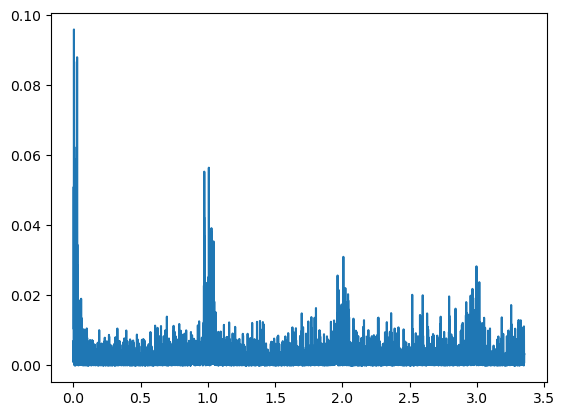

In [16]:
freq, power = ls(dfg_nodip["JD"], dfg_nodip["mag"]).autopower()

print(len(freq))
plt.plot(freq, power)

In [23]:
index_nums = heapq.nlargest(4,power)
j = freq[np.where(power == index_nums[1])]
t = (1 / j) #*2
print('frequency:',j)
print('period:', t)


dfg_nodip["OrbNum"] = dfg_nodip["JD"] / t
dfg_nodip["Phase"] = dfg_nodip["OrbNum"] % 1
dfg_nodip.head(10)

frequency: [0.0052771]
period: [189.49794902]


,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter,Mag,JD,OrbNum,Phase
0,2.458531e+06,2019-02-16.3942901,bE,2.04,15.584,13.945,0.048,9.599,0.428,g,13.945,2.458531e+06,12973.918205,0.918205
1,2.458531e+06,2019-02-16.3955583,bE,1.98,15.413,13.942,0.057,9.615,0.500,g,13.942,2.458531e+06,12973.918212,0.918212
2,2.458533e+06,2019-02-18.3889761,bi,1.44,15.988,13.918,0.033,9.835,0.296,g,13.918,2.458533e+06,12973.928732,0.928732
3,2.458533e+06,2019-02-18.3901884,bi,1.39,15.869,13.987,0.039,9.236,0.329,g,13.987,2.458533e+06,12973.928738,0.928738
4,2.458533e+06,2019-02-18.3914075,bi,1.38,15.785,13.948,0.040,9.570,0.356,g,13.948,2.458533e+06,12973.928745,0.928745
5,2.458539e+06,2019-02-24.3916663,bi,1.42,15.961,13.975,0.036,9.336,0.304,g,13.975,2.458539e+06,12973.960411,0.960411
6,2.458539e+06,2019-02-24.3928863,bi,1.50,15.958,13.951,0.035,9.546,0.304,g,13.951,2.458539e+06,12973.960418,0.960418
7,2.458539e+06,2019-02-24.3940998,bi,1.39,15.804,14.022,0.042,8.943,0.349,g,14.022,2.458539e+06,12973.960424,0.960424
8,2.458547e+06,2019-03-04.4047938,bE,1.49,15.871,13.981,0.038,9.286,0.328,g,13.981,2.458547e+06,12974.002701,0.002701
9,2.458547e+06,2019-03-04.4060770,bE,1.32,15.726,13.911,0.041,9.903,0.376,g,13.911,2.458547e+06,12974.002708,0.002708


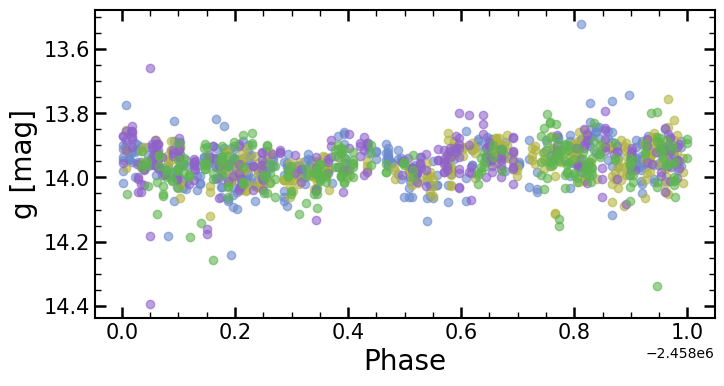

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg_nodip["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg_nodip.loc[dfg_nodip["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["Phase"]]
        cammag = [float(i) for i in camdf['mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show()